# Introduction
# 1. Domain-specific area

The domain we will be focused on in this coursework would be the world of biology, specifically the sub-discipline zoology. The fields of biology and data science have some areas in common. Most importantly, biologists and data scientists both analyze data sets to better understand the world, be it the human or animal world. Data science has slowly become more important to the world of biology throughout the years, where biologists have begun using machine learning and AI more frequently for medical diagnosis, automating repetitive tasks and more. Machine learning is a versatile set of techniques that is able to assist in making sense of large data sets with minimal human intervention.

In the zoology world, there is a need to understand the presence or absence of various species and their population trends in their habitats or areas of focus. An effective way to initialize this task would be the usage of camera-trap surveys. However, each survey would produce thousands of images or more. To go through all these images would involve a huge amount of time. This is where machine learning comes in; the usage of processing power of computers to complete the hard work of large-scale species recognition can massively speed up the analysis of the surveys and monitor wildlife trends with ease.

However, even after recognising the various species and obtaining the population count, there are still areas where in-depth analysis can be carried out and thus, more detailed data is required. For example the analysis of the gender, age or even the size of the animals in the area of focus can be carried out to assist the research and observation of zoologists. This is where trapping comes into play. Trapped animals at different sites can be measured and the data can be consolidated to help with the monitoring of the animal population.

## 2. Dataset

I have managed to identify a suitable data set that could be representative for the domain of zoology for this coursework, Possum Regression. This dataset can be accessed via the Kaggle official website. This particular possum dataset was originally found in the DAAG R package and used in the book Maindonald, J.H. and Braun, W.J. (2003, 2007, 2010) "Data Analysis and Graphics Using R"). However the original source would be from Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. Morphological variation among columns of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Australian Journal of Zoology 43: 449-458. 

The data set has the size of 104 examples of various possums. These 104 mountain brushtail possums were trapped at seven sites from Southern Victoria to central Queensland and their morphometric measurements were recorded in the data set. Morphometrics refer to the study of shape variation of organisms and its covariation with other variables. The data is a measurement of size, where the lengths, widths, masses and other measurements are analysed. Hence most of the datatypes in the data set being used would be numeric data types like int and float. There are a couple of attributes that are of a string datatype but stored as objects.

## 3. Objectives of the project
The project would like to explore the possibility of using regression to predict information and data of the animal population in a specific area. Previously in the introduction, it was mentioned that there is a need to understand the presence of species and their population trends in their habitats and that an effective way to begin this task would be to utilise the usage of camera-trap surveys. However, these surveys would only be able to confirm the population size of these animals, and that trapping would be a great addition to the tools used in the analysis.

Although trapping would provide detailed statistics about the animal population, it would be hard to carry out trapping in every habitat, for every animal group as this may take up to months or even years for one specific area. By the time trapping has been fully completed for an area, the animal population would have changed, and more steps have to be taken to keep the information updated. On the other hand, there have been efforts to develop machine learning algorithms to identify species in the massive number of camera trap images coming from the surveys. In the future, I believe algorithms with the ability to identify the size of the animals in the images will be developed as well. This would then facilitate a streamlined analysis of the animal population.

However, even with working machine learning algorithms, we can only analyze and evaluate physical measurements of the possums. There will be difficulties in analyzing statistics such as age or gender of the possums. With this project, I aim to find out if a Linear Regression model would be accurate enough to predict age of possums with their body dimensions. I hope to be able to help cut down on the time taken for the analysis and monitoring of wildlife trends by creating a tool that is easily used by any conservationist or zoologist with a large collection of animal images. Hopefully in the future with this tool, experts are better equipped to analyze the population of native or endangered animals, or even pests in the different locations.



# Implementation
## 4. Preprocessing
### Import of libraries and data

In [1400]:
#import data manipulation and visualisations libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#attributes normalisation
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

#import encoder
from sklearn import preprocessing

#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#import model evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1401]:
#loading of data from csv file
dataset = pd.read_csv('possum.csv')

#sneak peek of first 5 rows in data
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Basic info about data

In [1402]:
#number of rows and attributes
dataset.shape

(104, 14)

This shows us there are 104 entries and 14 attributes in the dataset.

In [1403]:
#all existing attributes in dataset
dataset.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

This provides a short summary of the different attributes available in the data set

In [1404]:
#existing datatypes of attributes in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


From this we can see that there are minimal null values within the dataset. Most of the attributes are of numerical datatypes, except for Pop (population) which is referring to location and sex which are stored as objects.

In [1405]:
#number of unique elements in each attribute
dataset.nunique(axis=0)

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

This shows us the number of unique elements in the different attributes.

### Cleaning dataset

In [1406]:
#dropping redundant attribute
dataset = dataset.drop(labels=['case'], axis=1)

This step removes the first column labelled case as this column keeps a count of the number of trapped possums in the dataset. This statistic can be deemed as useless in the analysis of the data

In [1407]:
#renaming the pop and site attributes
dataset = dataset.rename(columns={'Pop':'population_location', 'site':'site_of_trapping', 'taill':'tail_length'})


This step serves to provide more clarity in the three specific attributes' names in the dataset.

In [1408]:
#replace value for better readability
dataset.replace(to_replace={'Vic':'Victoria'}, inplace=True)

Similar to the previous step, this step improves readability such that users can identify the population location easily.

In [1409]:
#looking for missing values
#product function multplies all elements in dataset input
#rows (104) multiplied by columns (14)
total_cells = np.product(dataset.shape)
missing_values = (dataset.isnull().sum()).sum()
print('Number of missing values: ' + str(missing_values))

#calculating percentage of data that is missing
missing_percent = (missing_values/total_cells) * 100
print('Missing data is ' + str(round(missing_percent,2)) + '% of the entire dataset')

Number of missing values: 3
Missing data is 0.22% of the entire dataset


We are looking out for missing values in the dataset as part of preprocessing.

In [1410]:
#dropping missing data
dataset.dropna(axis=0, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   site_of_trapping     101 non-null    int64  
 1   population_location  101 non-null    object 
 2   sex                  101 non-null    object 
 3   age                  101 non-null    float64
 4   hdlngth              101 non-null    float64
 5   skullw               101 non-null    float64
 6   totlngth             101 non-null    float64
 7   tail_length          101 non-null    float64
 8   footlgth             101 non-null    float64
 9   earconch             101 non-null    float64
 10  eye                  101 non-null    float64
 11  chest                101 non-null    float64
 12  belly                101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


The missing data were located in the age and foot length attributes in the dataset. I felt that replacing these missing data with the mean was inappropriate as it may cause inaccuracies in the analysis and regression model later on. 

We check if the dataset still has missing values after dropping the missing data.

## 5. Key series of dataset

In [1411]:
#using describe to provide a statistical summary
dataset.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,site_of_trapping,age,hdlngth,skullw,totlngth,tail_length,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


The key series of the data set would actually be the physical features of the possums as these data would be used in the prediction. 

I decided to utilise the describe command as the result's index would include count, mean, standard deviation, min, max as well as the lower, middle and upper percentiles. The lower percentile refers to 25% and the upper percentile refers to 75%. The middle percentile (50%) would represent the median.

From the describe function, we can tell that the mean value of the different attributes do not deviate too much from the median value. This can be credited to the lack of extreme outliers which would skew the data to a great degree.

### Mode

In [1412]:
for column in dataset:
    data_mode = dataset[column].mode()[0]
    print('The mode for ' + column + ' = ' + str(data_mode))

The mode for site_of_trapping = 1
The mode for population_location = other
The mode for sex = m
The mode for age = 3.0
The mode for hdlngth = 93.3
The mode for skullw = 57.6
The mode for totlngth = 89.0
The mode for tail_length = 38.0
The mode for footlgth = 73.2
The mode for earconch = 44.9
The mode for eye = 14.5
The mode for chest = 28.0
The mode for belly = 32.0


## 6. Visualisation of data series

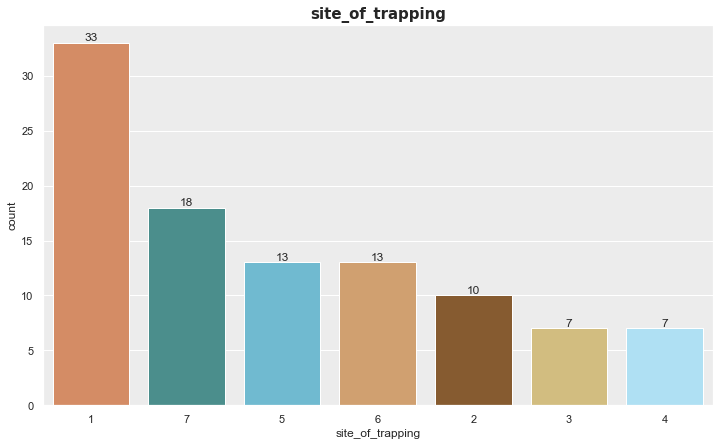

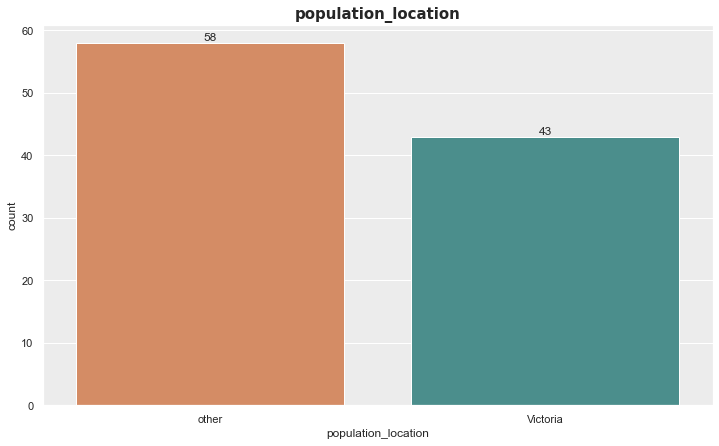

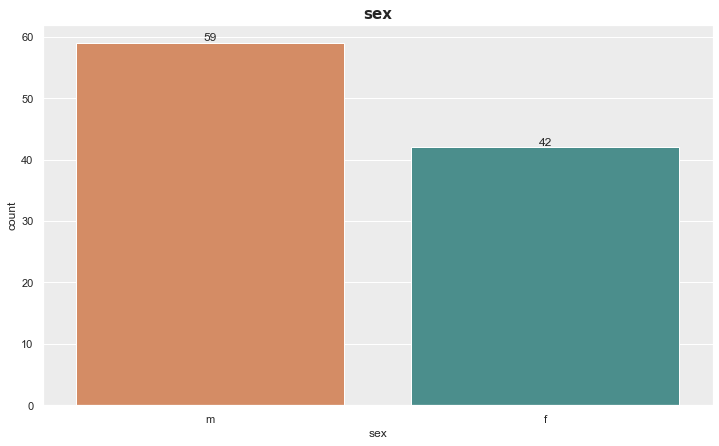

In [1413]:
#plotting categorical variables

#deciding categorical features to be included
cat_features = dataset[['site_of_trapping', 'population_location', 'sex']]
#deciding color palette
color_palette = ['#E68753', '#409996', '#60C3E0', '#E0A060', '#945B22', '#E0C472', '#A3E5FF']

#background color of all plots
sns.set(rc={'axes.facecolor':'#ECECEC'}) 

#plotting of graphs
for feature in cat_features:
    plt.figure(figsize = (12,7
                         ))
    plt.title(feature, fontsize = 15, fontweight = 'bold', fontname = 'Times', ha = 'center')
    ax = sns.countplot(x = dataset[feature], data = dataset, order = dataset[feature].value_counts().index, palette = color_palette)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

### Categorical variables

These diagrams are meant to summarize the categorical variables. In the first diagram, you can see that most of the possums were trapped in site 1 with 33 possums, followed by site 7 with 18 possums. Sites 5, 6 and 2 had similar number of possums trapped with 13, 13 and 10 respectively. Sites 3 and 4 wrapped up this statistic with 7 possums trapped in each site. This shows that either site 1 had the greatest number of possums residing there or the trapping techniques were particularly efficient at the site.

Next, the population_location diagram shows us that the majority of the possums were trapped in Victoria with 43 possums trapped. Although 58 possums were trapped in other locations which is a larger number compared to that of Victoria's, we shall assume that there were multiple locations included in the ‘other’ category.

Last but not least for the categorical variables we have the breakdown of the genders of trapped
possums. 59 male possums were trapped, compared to the 42 trapped female possums. Unfortunately there are no meaningful conclusions to be drawn from this.


### Numerical variables

I have decided to use boxplots to visualise the numerical variables as it provides properties like minimum, first quartile, median, third quartile as well as maximum. A box would also be created from the first quartile to the third quartile. This would provide a clearer view to the statistics of the trapped possums.



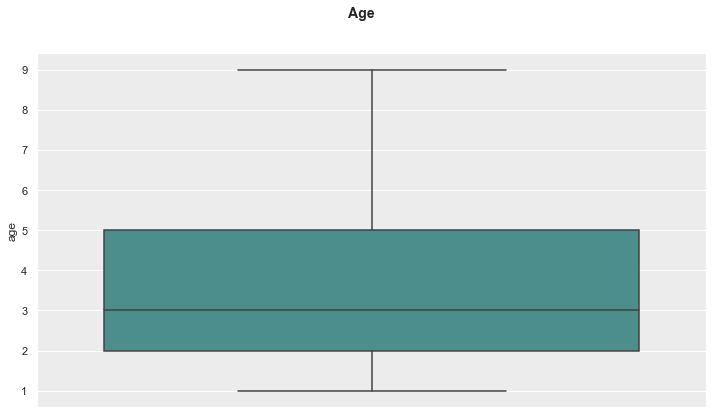

In [1414]:
#plotting numerical variables


#plotting of age graph

age_graph = plt.figure(figsize=(12,6.5))
age_graph.suptitle('Age', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['age'], data=dataset, color='#409996')
plt.show()

#### Age

In the illustrated diagram for the age statistic, we can see that most of the trapped possums are aged 5 or below. The median age of the trapped possums is 3 years old, with 2 years old and 5 years old the lower and upper quartile. The average age of the trapped possums is below their usual lifespan of 5 to 8 years. The youngest possum that was trapped was 1 year old, and the oldest was 9 years old. Most of the possums trapped are 5 years old or younger.

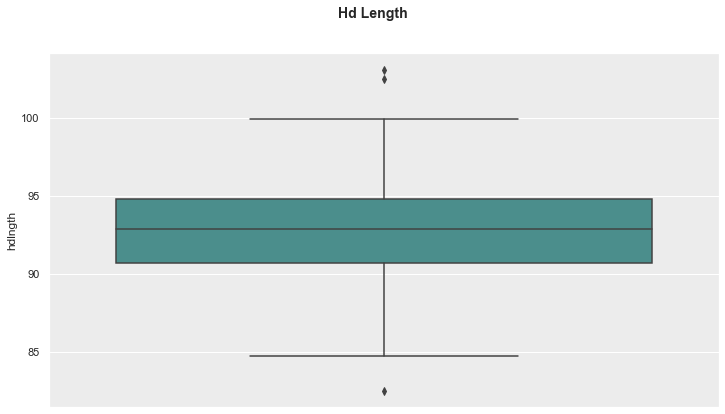

In [1415]:
#plotting of head length graph

hdlngth_graph = plt.figure(figsize=(12,6.5))
hdlngth_graph.suptitle('Hd Length', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['hdlngth'], data=dataset, color='#409996')
plt.show()

#### Head length

In the boxplot, we can see that the head length of the trapped possums vary from 85mm to 100mm, with two outliers with head lengths of over 100mm and one outlier at around 83mm.

The first and third quartiles are around 90.5mm and 95mm. The median head length is around 93mm. With 2 outliers above the upper whisker and 1 outlier below the lower whisker, we can assume that the average head length would be close to the median length of 93 mm. From this boxplot we can conclude that on average, possums aged between 2 to 5 years old have head lengths of 91 to 95mm.

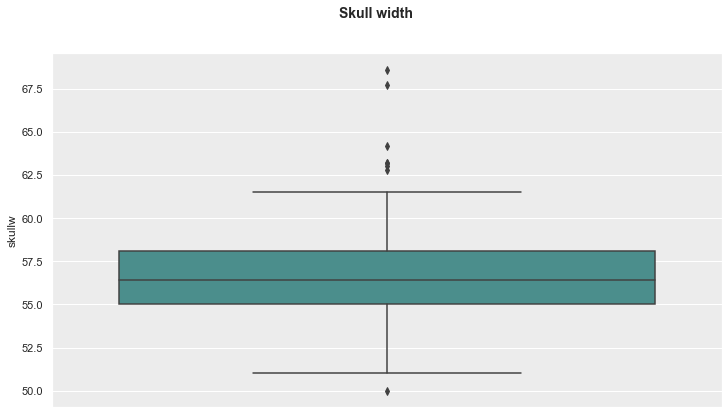

In [1416]:
#plotting of skull width graph

skull_graph = plt.figure(figsize=(12,6.5))
skull_graph.suptitle('Skull width', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['skullw'], data=dataset, color='#409996')
plt.show()

#### Skull width

Over at the skull width boxplot, we can see that although most of the possums' skull widths lie between around 51 mm and 62 mm, there are a few outliers lying between 62.5mm and 68mm. However, there is a possum with a smaller skull width of 50 mm.

With a first quartile of 55 mm and a third quartile of 58 mm, the average skull width would be around 57 mm. The median skull width is at 56 mm. With the slightly larger number of outliers, we can then conclude that skull widths are not necessarily related the head length of the possums, and some possums have unusually larger skull widths. The median skull width would be a more appropriate representation of the skull width data.

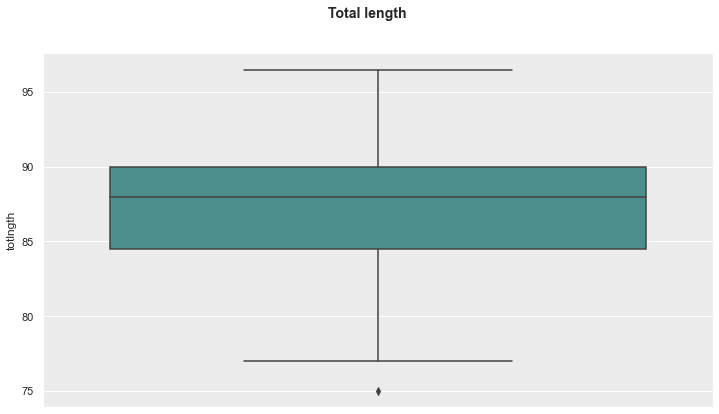

In [1417]:
#plotting of total length graph

totlngth_graph = plt.figure(figsize=(12,6.5))
totlngth_graph.suptitle('Total length', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['totlngth'], data=dataset, color='#409996')
plt.show()

#### Total length

In the total length graph, we can see that the total length of the possums lie between 77 cm and 96 cm, with a single outlier of 75 cm. The first quartile is around 85 cm and the third quartile is 90 cm, with a median of 88 cm. This would mean that approximately half of the trapped possums are between 85 cm and 90 cm.

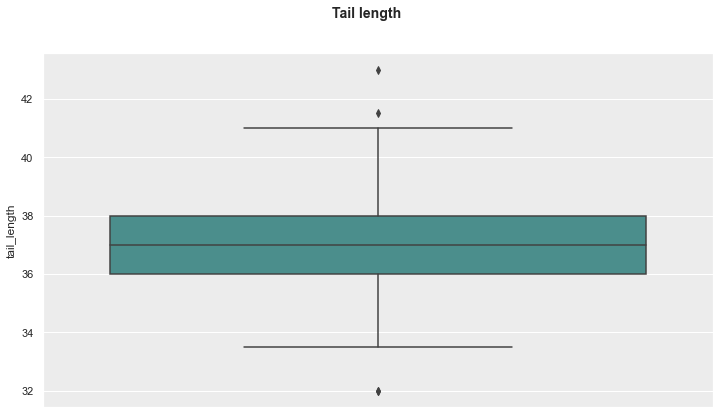

In [1418]:
#plotting of tail length graph

tail_graph = plt.figure(figsize=(12,6.5))
tail_graph.suptitle('Tail length', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['tail_length'], data=dataset, color='#409996')
plt.show()

#### Tail length

From the plotted graph we can tell that most of the possums have tail lengths between 33.8 mm and 41 mm, with 3 outliers of 32 mm, 41.9 mm and 43 mm. 50% of the trapped possums have tail lengths between 36 mm and 38 mm. With a minimal number of outliers which are not too extreme, it is safe to assume that the mean would be close to the median value of 37 mm.

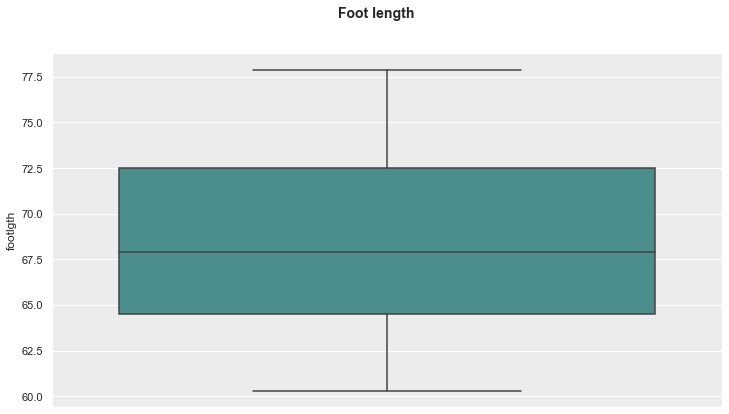

In [1419]:
#plotting of foot length graph

ftlngth_graph = plt.figure(figsize=(12,6.5))
ftlngth_graph.suptitle('Foot length', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['footlgth'], data=dataset, color='#409996')
plt.show()

#### Foot length

The foot length boxplot tells us that the foot length of the trapped possums lie between 60 mm and 77.5 mm. The 25th and 75th percentiles are 65 mm and 72.5 mm, with a median length of approximately 68 mm. With the absence of outliers, we can assume the mean of the possums' foot length is close to the median of 68 mm. 

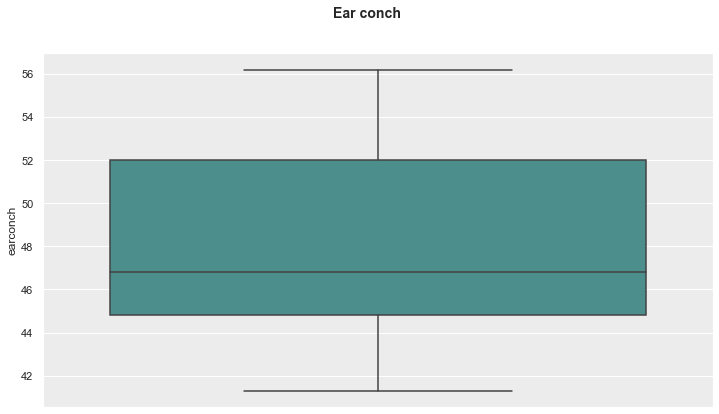

In [1420]:
#plotting of ear conch graph

ear_graph = plt.figure(figsize=(12,6.5))
ear_graph.suptitle('Ear conch', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['earconch'], data=dataset, color='#409996')
plt.show()

#### Ear conch

The ear conches of the trapped possums are measured betewen 41.8 mm and 56 mm. 75% of the possums have ear conches measuring at 52 mm or below, with the median value of approximately 46.8 mm. Similar to the foot length attribute, there are no outliers for ear conch, which results in a mean value of approximately 47 mm. 

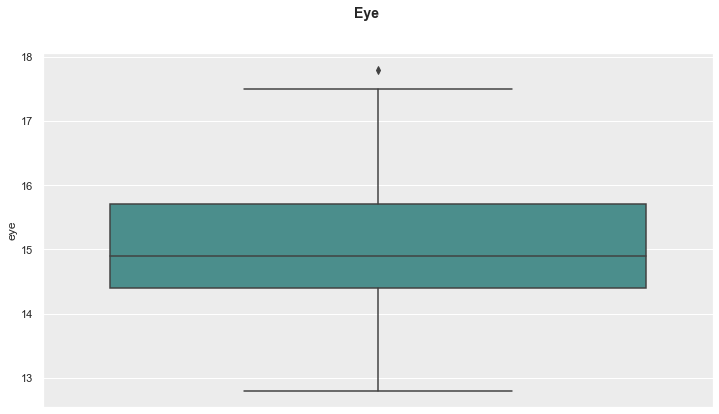

In [1421]:
#plotting of eye graph

eye_graph = plt.figure(figsize=(12,6.5))
eye_graph.suptitle('Eye', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['eye'], data=dataset, color='#409996')
plt.show()

#### Eye

The boxplot of the eye attribute shows us that most of the eye length of the possums lie between 12.9 mm and 17.5 mm, with a single outlier of 17.8 mm. 50% of the possums have eye lengths between 14.4 mm and 15.8 mm. With a median length of 14.9 mm and the presence of one outlier, we can assume that the mean eye length of the possums is approximately 15 mm.

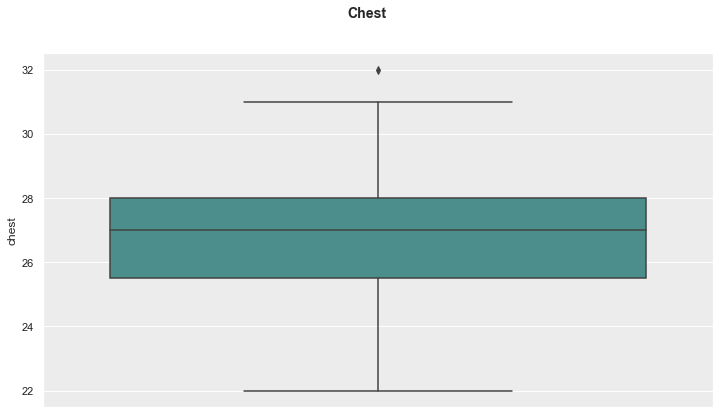

In [1422]:
#plotting of chest graph

chest_graph = plt.figure(figsize=(12,6.5))
chest_graph.suptitle('Chest', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['chest'], data=dataset, color='#409996')
plt.show()

#### Chest
From the chest boxplot we can tell that the chest length of the possums lie between 22 mm and 31 mm. 50% of the possums have chest lengths of between 25.5 mm and 28 mm, with a median value of 27 mm. However, there is only 1 outlier of 32 mm, allowing us to predict that the mean head length of the possums is around 27 mm as well.

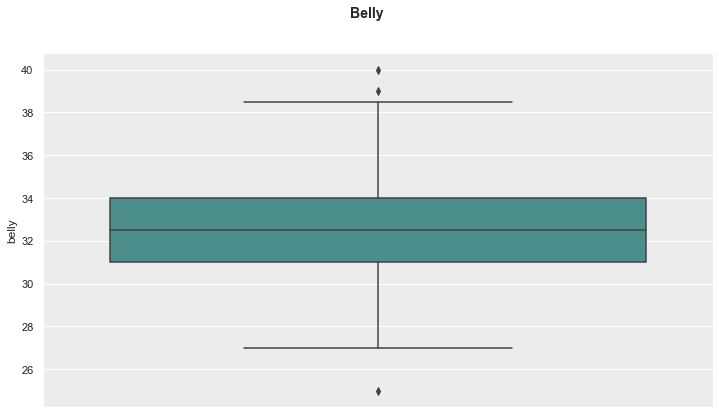

In [1423]:
#plotting of belly graph

belly_graph = plt.figure(figsize=(12,6.5))
belly_graph.suptitle('Belly', fontsize=14, fontweight='bold')
sns.boxplot(y=dataset['belly'], data=dataset, color='#409996')
plt.show()

#### Belly
The belly boxplot shows us that majority of the possums have belly lengths between 27 cm and 38.4 cm. There are 3 outliers in this attribute: 25 cm, 39 cm and 40 cm. 50% of the possums have similar belly lengths, ranging from 31 cm to 34 cm. The median of the belly lengths is approximately 32.5 cm. The outliers are observed to be not too extreme, allowing us to assume that the mean belly length would be close to the median value of 32.5 cm.

### Bonus: Relationships between variables

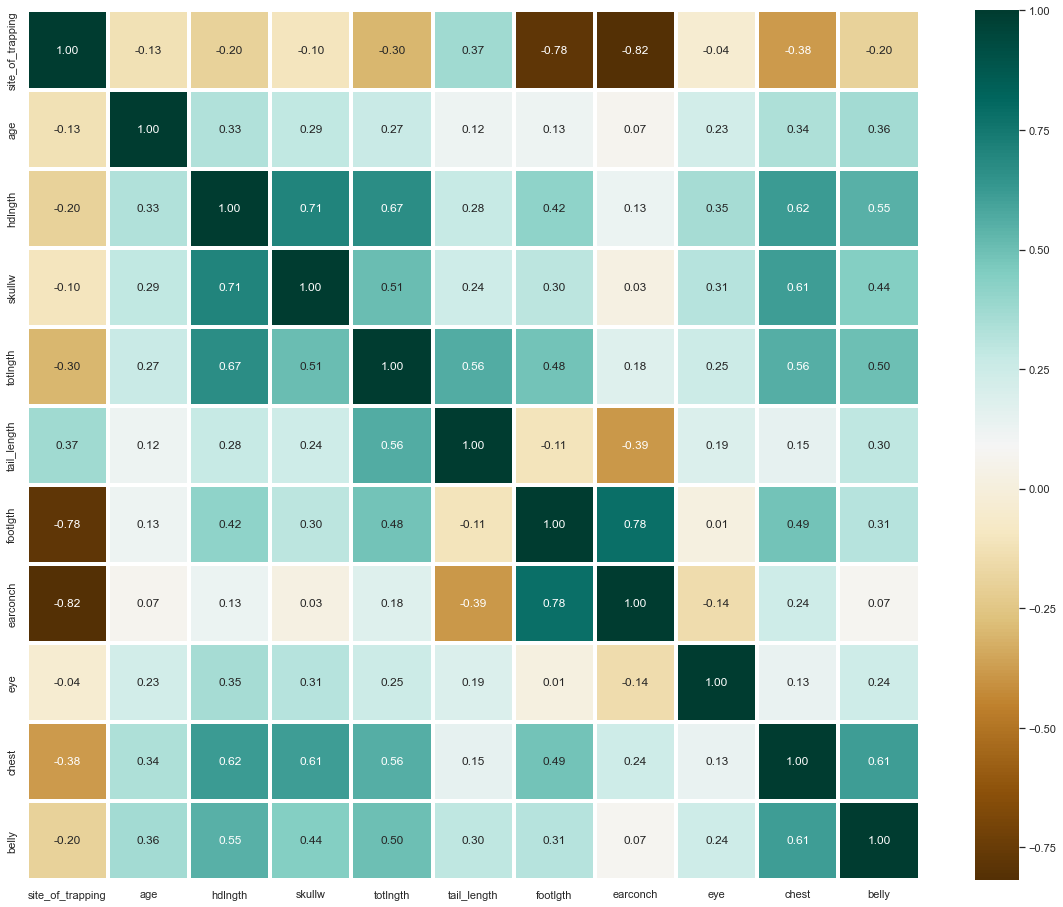

In [1424]:
#using a heatmap to display correlations between features
corr = dataset.corr()

plt.figure(figsize = (20, 16))
sns.heatmap(corr, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

Here is a diagram to display the correlations between the different variables in the dataset. From the right side of the diagram you can see a scale which shows you that as two variables become more positively correlated, the darker the shade of blue will be. On the other hand, when two variables are more negatively correlated, it will be colored in a darker shade of orange.

There are some interesting correlations to be observed where firstly, the most negatively correlated variable would be the site_of_trapping with ear conch and foot length at -0.82 and -0.78 respectively. This would mean that when ear conch increases or decreases, foot length of the possum would do the opposite. On the other hand, the most positively correlated variables would be ear conch with foot length at 0.78 followed closely by skull width with head length at 0.71. This shows that there are significant relationship between skull width and head length whereby when skull width rises or falls, head length would do the same.

Last but not least, there are three sets of variables which have almost no correlation between them. At -0.04, we have the eye and site of trapping pairing. Next would be the ear conch and skull width pairing at 0.03. I was surprised by this as I expected the size of the ear conch to be closely related to the skull width of the possums. Finally, the pairing with most no correlation would be foot length and eye.

## 7. ML Model
### Preparation of data

#### Normalization
To use the provided dataset as input for Linear regression, normalization has to occur so that our data follow the normal (Gaussian) distribution. Normality is an important assumption for many statistical techniques. Thus, we shall use the boxcox function from the scipy library. A box cox transformation turns non-normal dependent variables into a normal shape, allowing broader number of tests to be carried out.

Only the skull width variable needs to be normalised as it is the only variable with many extreme outliers. Thus we have to make sure it follows normal distribution.

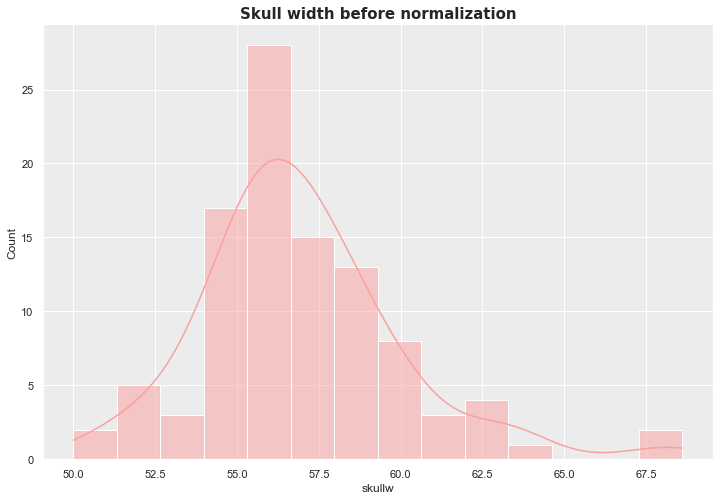

In [1425]:
#skull width attribute before transformation
plt.figure(figsize=(12,8)) 
plt.title('Skull width before normalization', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
sns.histplot(data=dataset, x="skullw", kde=True, color='#FAA0A0')
plt.show()

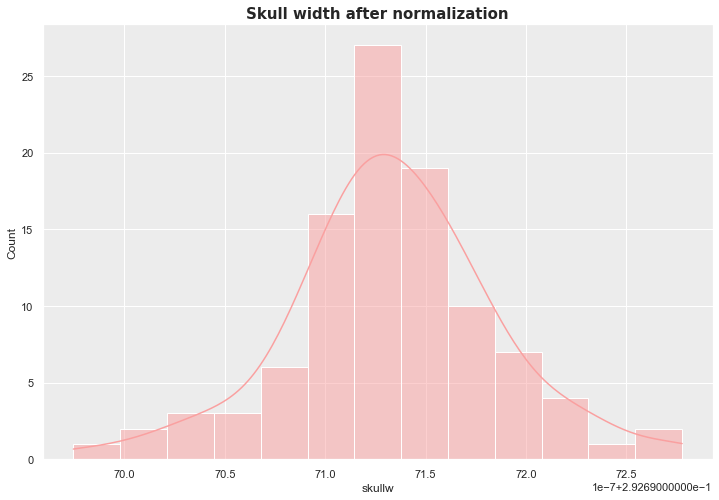

In [1426]:
#skull width attribute after transformation
dataset['skullw'] = boxcox(x=dataset['skullw'])[0]

plt.figure(figsize=(12,8)) 
plt.title('Skull width after normalization', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
sns.histplot(data=dataset, x="skullw", kde=True, color='#FAA0A0')
plt.show()



From the boxcox transformation, one can see that before the change the data was slightly skewed to the left of the graph. There is a small gap in the values as well on the right side of the graph. After the transformation, boxcox has returned fitted data. Now this data is normalized.

#### Transforming categorical variables

Next we will transform categorical variables into numerical using LabelEncoder and OneHotEncoder functions. This would transform the categorical variables to be valid as input for machine learning models.

LabelEncoder encodes target labels with values between 0 and n_classes-1 and is used to encode target values. OneHotEncoder, on the other hand encodes categorical features as a one-hot numeric array. This encoding is required to feed categorical data to many scikit-learn estimators.

Due to the fact that population_location and sex only have 2 categories and the order does not matter, I felt that OneHotEncoder would be more appropriate. If the variables have a lot of categories and OneHotEncoder was used, the problem of curse of dimensionality will have to be dealt with appropriately.

In [1427]:
#preparing data for bonus section below
data_bonus = dataset

#transform all categorical attributes into numerical using LabelEncoder as a preparation for model implemetation
category_columns = [cname for cname in data_bonus.columns
                        if data_bonus[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in category_columns:
    data_bonus[col] = encoder.fit_transform(data_bonus[col])
    
data_bonus.head()



,site_of_trapping,population_location,sex,age,hdlngth,skullw,totlngth,tail_length,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,0.292697,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,0.292697,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,0.292697,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,0.292697,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,0.292697,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [1428]:
#transforming categorical attributes into numerical using LabelEncoder to prepare for model implemetation
encoder = preprocessing.LabelEncoder()
dataset['site_of_trapping'] = encoder.fit_transform(dataset['site_of_trapping'])
dataset.head()

,site_of_trapping,population_location,sex,age,hdlngth,skullw,totlngth,tail_length,footlgth,earconch,eye,chest,belly
0,0,0,1,8.0,94.1,0.292697,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,0,0,6.0,92.5,0.292697,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,0,0,6.0,94.0,0.292697,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,0,0,6.0,93.2,0.292697,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,0,0,2.0,91.5,0.292697,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [1429]:
#encoding categorical attributes with .get_dummies() function to prepare for model implemetation
#get_dummies function converts categorical attributes to dummy/indicator variables
dataset = pd.get_dummies(data = dataset, columns = ['population_location', 'sex'])
dataset.head()

,site_of_trapping,age,hdlngth,skullw,totlngth,tail_length,footlgth,earconch,eye,chest,belly,population_location_0,population_location_1,sex_0,sex_1
0,0,8.0,94.1,0.292697,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,1
1,0,6.0,92.5,0.292697,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,1,0
2,0,6.0,94.0,0.292697,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,1,0
3,0,6.0,93.2,0.292697,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,1,0
4,0,2.0,91.5,0.292697,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,1,0


#### ML Model 

In [1430]:
#preparation of target variable Age for implementation in ML models

X = dataset

#dropping of target variable from features
X = X.drop('age', axis = 1)

#we add target variable to y
y = dataset['age']

X.columns

Index(['site_of_trapping', 'hdlngth', 'skullw', 'totlngth', 'tail_length',
       'footlgth', 'earconch', 'eye', 'chest', 'belly',
       'population_location_0', 'population_location_1', 'sex_0', 'sex_1'],
      dtype='object')

The variables that will be used in the regression model would be every variable except 'hdlngth','skullw', 'footlgth' and 'earconch'. These 4 variables were not chosen due to the prerequisite - Little or no multicollinearity among variables. Previously from the heatmap, we managed to located the variables with high positive or negative correlationships. Thus in this next step we shall remove them from the variables being used in building the model.

In [1431]:
#dropping of correlated variables
X = X.drop(['hdlngth','skullw', 'footlgth', 'earconch'], axis = 1)

In [1432]:
#preparation of train and test data for ML model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Before we build our regression model, we have to split our dataset into tran and test data. We shall be using the train test split function for this part of the coursework. 

A small break down of the variables involved in the train test split function is as follows:
- arrays: X = features, y = target variable, age
- test_size: Size of test data which is usually set at 30% or 33%
- train_size: This will be set as default, which sets the value to complement the test size
- random_state: Set as 1 to ensure all models have same distribution of input data
- shuffle: Set as default which is True to shuffle the data before splitting
- stratify: set as default which is None, splitting the data in a stratified fashion such that each class is correctly represented in te training and testing sets

In [1433]:
#implementing Linear Rgression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[3.71217498 3.3190609  4.18974366 4.5708066  3.11443709 3.64531272
 4.87710723 4.8764059  2.89196662 4.26418598 4.04079833 3.76327623
 4.64379416 3.41691263 3.8896512  4.13647375 2.76779232 3.33968425
 3.96696321 3.08195347 3.16367359 3.15796334 2.40814766 3.0239372
 1.18409667 3.3590357  3.22370617 4.73021246 5.31437097 3.81728739
 3.99214925]


# Conclusions

## 9. Evaluation of ML model


In [1434]:
#RMSE of Age
rmse_possum = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE of Age feature: ' + str(rmse_possum))
print(f'Standard Deviation of Age:{dataset.age.std()}')

RMSE of Age feature: 1.742844071701629
Standard Deviation of Age:1.9151816603338725


In [1435]:
#normalizing RMSE
norm_rmse = rmse_possum/(9-1)
print('Normalized RMSE: ' + str(norm_rmse))

Normalized RMSE: 0.21785550896270361


#### RMSE

We will now evaluate the results of the machine learning model by utilising the RMSE as well as R2 score methods. 

RMSE, also known as root-mean-squared error is a standard way to measure the error of a model in predicting quantitative data. It is the standard deviation of prediction errors (residuals). Residuals are a measure of how far the data points are from the regression line and thus RMSE tells us how centrated the data is around the line of best fit. The lower the result of RMSE, the smaller the area around the predicted line and therefore, the better fit of the model used here.

For this particular model, the RMSE is calculated to be 1.74. Given the fact that the range of the possums' age is between 1 and 9, this RMSE value is quite high. To gain a better understanding of whether this RMSE value is good, we can normalize the RMSE by dividing it by the difference between the maximum and minimum value. This would give us a normalized RMSE value of 0.218. The closer the normalized RMSE value is to 0, the better the model. Thus we can conclude that this model is not able to predict ages of the possums very accurately.

In [1436]:
#R2 of age
r2 = r2_score(y_test, y_pred_lr)
print('The R2 score for this Linear regression modei is', r2)

The R2 score for this Linear regression modei is 0.053488085151375486


#### R2

R-Squared, or R2 is a measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. To simplify this, R2 shows how well data fits in the regression model. A low R2 figure is generally bad for predictive models
and the closer the R2 score is to 1, the better predictions the model does. When we combine this R2 score of 0.05 with the RMSE score obtained previously, we can conclude that this is not an effective predictive model.

## Bonus analysis

We shall now analyze the second strongest positive correlation within the features in the dataset. This would be head length and skull width at 0.71. I chose this set of data as it seemed more logical than the strongest positive correlation which is earconch and foot length.

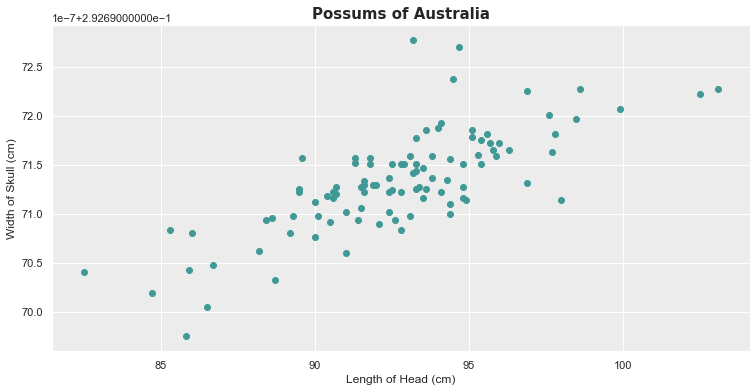

In [1437]:
#analysing relationship for data wth the second strongest positive correlation: headlength and skullwidth

#prepare attribute hdlngth for future usage
head_length_values = dataset.hdlngth.values 
#prepare attribute skullw for future usage
skull_width_values = dataset.skullw.values 

plt.figure(figsize=(12.5, 6))

#plotting attributes in scatter
plt.scatter(head_length_values, skull_width_values, color='#409996')

#labelling of graph
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Possums of Australia", size=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.show()

In [1438]:
#preparing data for model implementation
head_length_vector = head_length_values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(head_length_vector, skull_width_values, test_size=0.3)

Text(0.5, 1.0, 'Training Data')

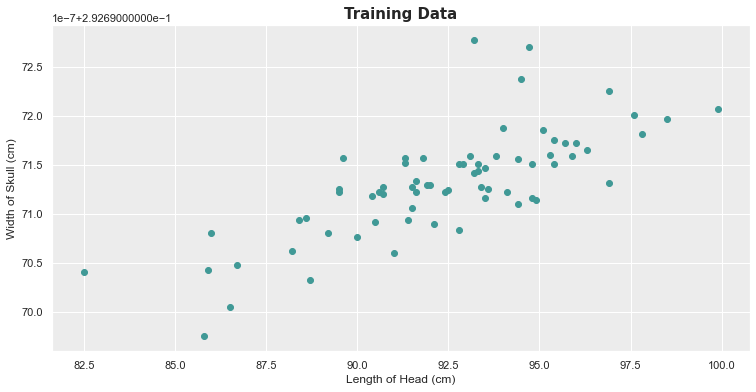

In [1439]:
#plotting of training data graph
plt.figure(figsize=(12.5,6))
plt.scatter(x_train, y_train, color='#409996')
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Training Data", size=15, fontweight='bold', fontname='Helvetica', ha='center')

Text(0.5, 1.0, 'Testing Data')

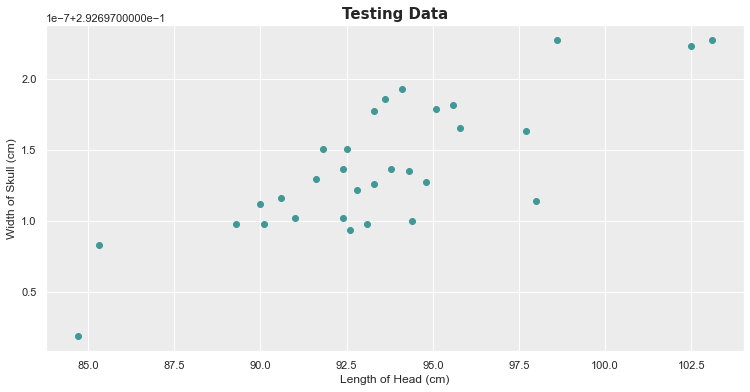

In [1440]:
#plotting of test data graph
plt.figure(figsize=(12.5,6))
plt.scatter(x_test, y_test, color='#409996')
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Testing Data", size=15, fontweight='bold', fontname='Helvetica', ha='center')

In [1441]:
#applying linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(f"Training accuracy {round(lr.score(x_train, y_train)*100,2)} %")
print(f"Testing accuracy {round(lr.score(x_test, y_test)*100,2)} %")

Training accuracy 56.61 %
Testing accuracy 55.38 %


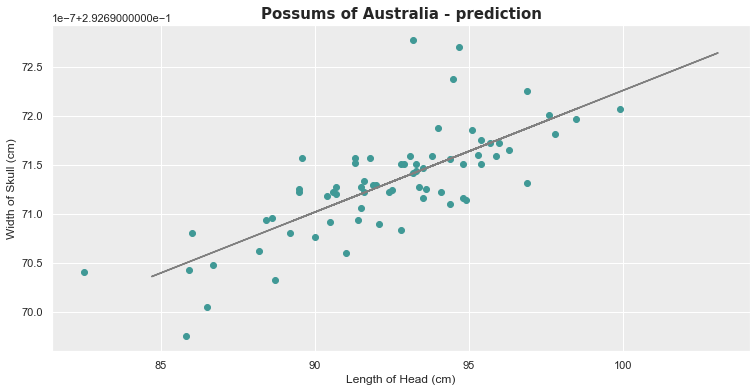

In [1442]:
#plotting of real and predicted values graph
plt.figure(figsize=(12.5,6))
#scatter plot = real values
plt.scatter(x_train, y_train, color='#409996')
#line plot = predicted values
plt.plot(x_test, y_pred_lr, color='grey')
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Possums of Australia - prediction", fontsize = 15, fontweight='bold', fontname='Helvetica', ha='center')
plt.show()

From this graph we can see that the line graph is quite accurate as compared to the actual statistics. Majority of the scatter plot is located in close range of the line plot, with the exceptions of a few outliers.

## 10. Reflections

In light of the obtained results, the developed project can be seen as a predictive model that is not effective. With a very low R2 score and a RMSE value that is considered high given the range of the variable, the model can be concluded to be not accurate. I feel that with some tweaks in the variables used, this project would perhaps be transferable to other areas such as predicting the gender of animals via their body dimensions. With this solution, zoologists can tackle issues such as population control and carry out necessary measures for the greater good of the animals' habitats.

Python is undoubtedly the most widely used programming language in the machine learning world. However, this project can be reproduced by using another widely used language, Ruby. Jupyter notebook supports the Ruby kernel, and after installing IRuby, one will be able to utilise some Ruby libraries. For each of the main Python libraries such as pandas, numpy and scikit-learn, there are Ruby counterparts that are actively supported such as daru, numo-narray and rumale.

This project can also be reproduced in other development environments such as Visual Studio Code, Sublime Text 3 and Atom. With the right extensions, these IDEs will be able to support the Python related development required for this project.

I felt that this project could have been reproduced perhaps in a better way if I utilised various machine learning techniques such as Random Forest. Random Forest is a technique that creates and combines a large number of decision trees which are used on distinct subsets of the same dataset, and the average is used to improve the projected accuracy. Data of each tree is collected and the future is forecasted based on the majority of the predictions. The Random Forest algorithm provides a high level of precision and it operates well in big databases.